In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
schools = pd.read_csv("scc_school_data.csv")
schools.head()

,School Name,School District,City,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,Graduation Rate
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06,95%
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06,95%
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06,96%
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,93%
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06,93%


In [69]:
# refactor the graduation rate column 
schools['Graduation Rate'] = schools['Graduation Rate'].str.findall('(\d+)%').str[0]
schools['Graduation Rate'] = schools['Graduation Rate'].astype(int)
schools.head()

,School Name,School District,City,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,Graduation Rate
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06,95
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06,95
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06,96
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,93
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06,93


## Exploratory Data Analysis

<AxesSubplot:>

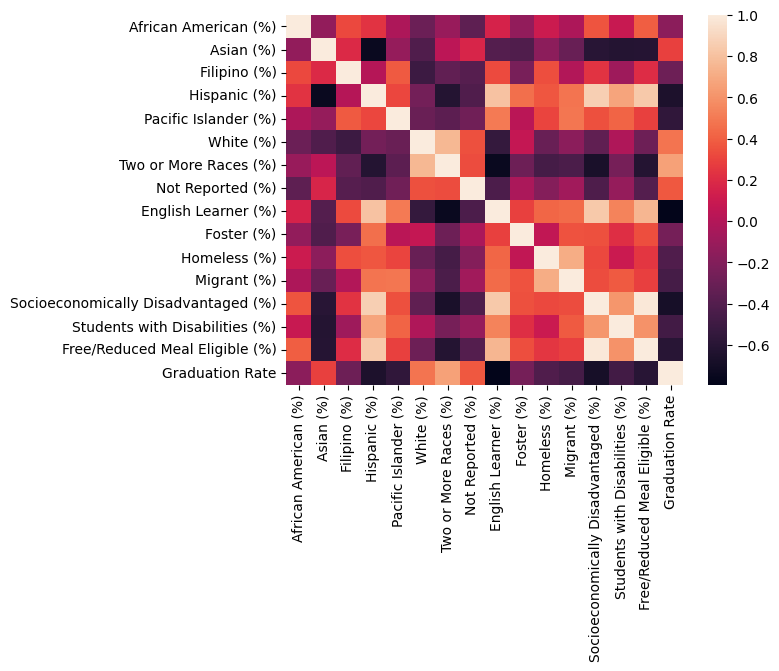

In [71]:
# a heatmap of some columns in schools
cols = [col for col in schools.columns if '%' in col] + ['Graduation Rate']
corr = schools[cols].corr()

sns.heatmap(corr)

Index(['African American (%)', 'Asian (%)', 'Filipino (%)', 'Hispanic (%)',
       'Pacific Islander (%)', 'White (%)', 'Two or More Races (%)',
       'Not Reported (%)', 'English Learner (%)', 'Foster (%)', 'Homeless (%)',
       'Migrant (%)', 'Socioeconomically Disadvantaged (%)',
       'Students with Disabilities (%)', 'Free/Reduced Meal Eligible (%)',
       'Graduation Rate'],
      dtype='object')


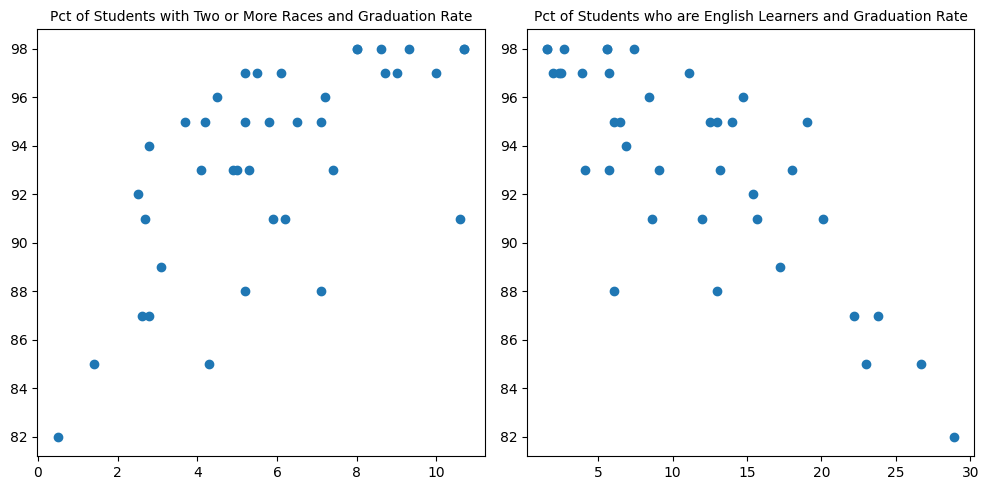

In [95]:
# plotting high correlation features with grad rates
high_corr_cols = corr.columns[(corr.abs() > 0.9999).any()]
print(high_corr_cols)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
    
axes[0].scatter(x=schools['Two or More Races (%)'], y=schools['Graduation Rate']) 
axes[0].set_title('Pct of Students with Two or More Races and Graduation Rate', fontsize=10)
axes[1].scatter(x=schools['English Learner (%)'], y=schools['Graduation Rate'])  
axes[1].set_title('Pct of Students who are English Learners and Graduation Rate', fontsize=10)
plt.tight_layout()
plt.show()